In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
file_path = 'ploting.txt'
df = pd.read_csv(file_path, sep=';')

columns = ['Model', 'Epochs', 'Learning Rate', 'Accuracy', 'Parameters','Factorized', 'Quantize', 'DA', 'Prune Size', 'Prune Type','Prune Ratio[%]', 'Time[min]', 'Train Losses', 'Test Losses','Accuracies', ' batch_size']

print(df[columns])


              Model  Epochs  Learning Rate  Accuracy  Parameters  Factorized  \
0      PreActResNet     150           0.05     91.62     4946596       False   
1      PreActResNet     150           0.05     89.29     3543204        True   
2      PreActResNet     150           0.05     86.25      768484        True   
3      PreActResNet       1           0.05     90.49     4902101       False   
4      PreActResNet       1           0.05     89.37     3517947        True   
5      PreActResNet       1           0.05     86.27      763240        True   
6      PreActResNet      20           0.05     92.07     4902101       False   
7      PreActResNet      20           0.05     89.57     3543204        True   
8      PreActResNet      20           0.05     86.62      754993        True   

  Quantize     DA  Prune Size Prune Type  Prune Ratio[%]   Time[min]  \
0     None   True     4946596          0             0.3  124.414637   
1     None   True     3543204          0             0.

In [33]:
epochs = 'Epochs'
acc = 'Accuracy'
lr = 'Learning Rate'
MX = 'MixUp'
params = 'Parameters'
amount = 'Amount'

In [34]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return float(value.replace('[', '').replace(']', '').split(',')[0])  # Assuming the first value is correct

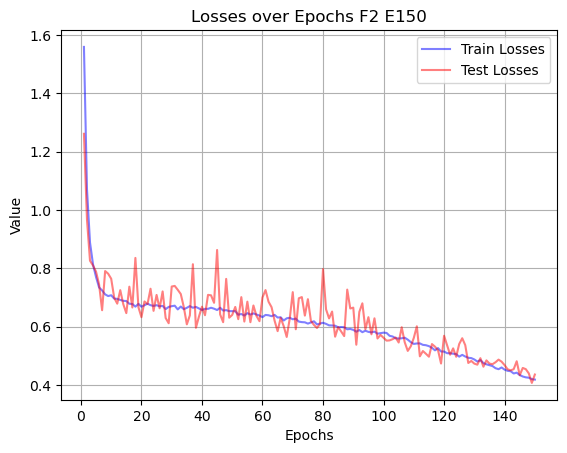

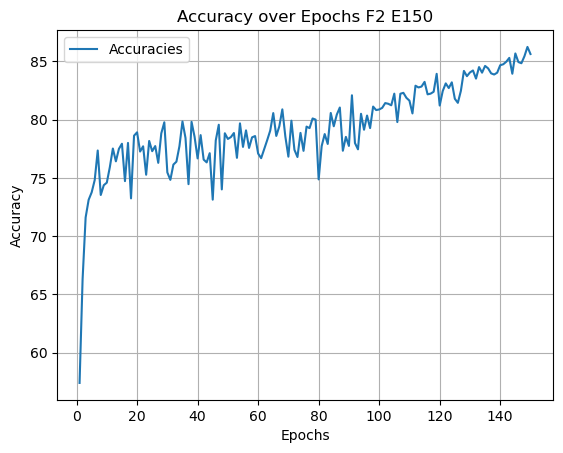

In [35]:
row = 2
epochs = df.loc[row]['Epochs']
epochs = range(1,epochs+1)

train_losses = df.loc[row]['Train Losses'].strip('[]').split(',')
train_losses = np.array(train_losses, dtype=float).astype(float)
test_losses = df.loc[row]['Test Losses'].strip('[]').split(',')
test_losses = np.array(test_losses, dtype=float).astype(float)


plt.figure(1)
plt.plot(epochs, train_losses, label='Train Losses', color='blue', alpha=0.5)
plt.plot(epochs, test_losses, label='Test Losses', color='red', alpha=0.5)

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses over Epochs F2 E150')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('images/Project/PreAct_100_DA_losses.png')

accuracies = df.loc[row]['Accuracies'].strip('[]').split(',')
accuracies = np.array(accuracies, dtype=float).astype(float)

plt.figure(2)
plt.plot(epochs, accuracies, label='Accuracies')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs F2 E150')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('images/Project/PreAct_100_DA_accuracies.png')


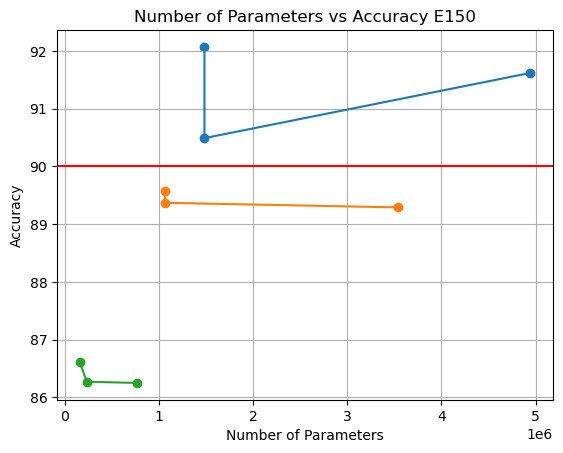

In [38]:
# rows1 = [0,1,2,3,4,5]
# rows2 = [6,7,8,9,10,11]
# rows3 = [12,13,14,15,16,17]

rows1 = [0,3,6]
rows2 = [1,4,7]
rows3 = [2,5,8]
parameters1 = df.loc[rows1, 'Parameters']
accuracy1 = df.loc[rows1, 'Accuracy']
prune1 = df.loc[rows1,'Prune Size']

parameters2 = df.loc[rows2, 'Parameters']
accuracy2 = df.loc[rows2, 'Accuracy']
prune2 = df.loc[rows2,'Prune Size']

parameters3 = df.loc[rows3, 'Parameters']
accuracy3 = df.loc[rows3, 'Accuracy']
prune3 = df.loc[rows3,'Prune Size']


plt.scatter(prune1, accuracy1)
plt.plot(prune1, accuracy1)

plt.scatter(prune2, accuracy2)
plt.plot(prune2, accuracy2)

plt.scatter(prune3, accuracy3)
plt.plot(prune3, accuracy3)

plt.axhline(y = 90, color = 'r', linestyle = '-') 
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Number of Parameters vs Accuracy E150')
plt.grid(True)
# plt.legend(("Base","Base","F1","F1","F2","F2"), loc='lower right')
# plt.legend(("Base","F1","F2"), loc='lower right')
# plt.show()
# plt.savefig('images/Project/Base_vs_F1_vs_F2_E150_StructuredPruning.png')

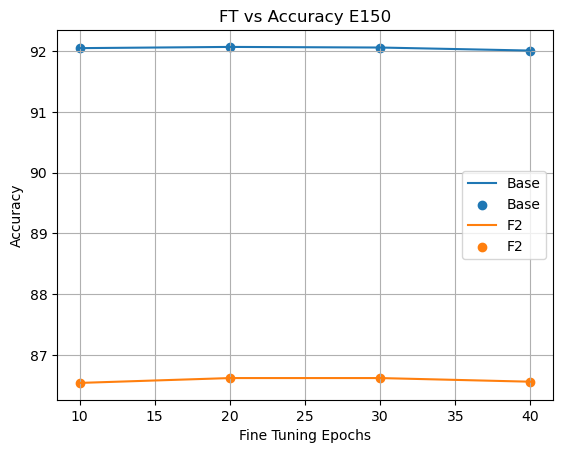

In [37]:
import matplotlib.pyplot as plt

x = [10, 20, 30, 40]
y1 = [86.54, 86.62, 86.62, 86.56]
y2 = [92.05, 92.07, 92.06,92.01]

plt.plot(x, y2, label='Base')
plt.scatter(x, y2, label='Base')

plt.plot(x, y1, label='F2')
plt.scatter(x, y1, label='F2')

plt.xlabel('Fine Tuning Epochs')
plt.ylabel('Accuracy')
plt.title('FT vs Accuracy E150')
plt.legend()
plt.grid()

plt.show()